# 실험설계및분석 중간고사

---
---
---

# Session 2 Basic Statistics

## 2-sample t-Test : 2표본 t-검정
두 모집단이 서로 독립인 경우 적용

### 1. for Unstacked Data

In [17]:
y1 <- c(16.85,16.40,17.21,16.35,16.52,17.04,16.96,17.15,16.59,16.57)
y2 <- c(16.62,16.75,17.37,17.12,16.98,16.87,17.34,17.02,17.08,17.27)

In [39]:
y.unstacked <- data.frame(Modified=y1,Unmodified=y2) # 데이터프레임 형성
y.unstacked

Modified,Unmodified
<dbl>,<dbl>
16.85,16.62
16.40,16.75
17.21,17.37
16.35,17.12
16.52,16.98
17.04,16.87
16.96,17.34
17.15,17.02
16.59,17.08


### t.test : t검정

**t.test** : 유의수준과 p-value(유의확률)을 이용하여 검정진행 </br>
p-value가 유의수준보다 클 경우 귀무가설 채택, 작을 경우 귀무가설 기각

본 검정에서 귀무가설은 두 모집단의 평균이 같다이다.

In [44]:
t.test(y1,y2,alternative = "two.sided") 

# p-value가 유의수준인 0.05보다 작기 때문에 귀무가설을 기각한다
# 따라서 두 모집단의 평균이 다르다고 결론내릴 수 있다


	Welch Two Sample t-test

data:  y1 and y2
t = -2.1869, df = 17.025, p-value = 0.043
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.546174139 -0.009825861
sample estimates:
mean of x mean of y 
   16.764    17.042 


### shapiro.test : 정규성 검정

**shapiro.test** : 잔차(e)가 정규분포를 따르는 지를 검정

본 검정에서 귀무가설은 잔차가 정규분포를 따른다이다.

In [45]:
apply(y.unstacked,2,shapiro.test) 

# p-value가 유의수준인 0.05보다 크므로 귀무가설을 채택한다
# 따라서 잔차는 정규분포를 따른다고 할 수 있다

$Modified

	Shapiro-Wilk normality test

data:  newX[, i]
W = 0.91863, p-value = 0.3457


$Unmodified

	Shapiro-Wilk normality test

data:  newX[, i]
W = 0.96262, p-value = 0.8153



### var.test : 등분산 검정

**var.test** : 두 모집단의 분산이 동일한지를 검정

본 검정에서 귀무가설은 두 모집단의 분산이 동일하다이다.

In [43]:
var.test(y1,y2)

# p-value가 유의수준인 0.05보다 크므로 귀무가설을 채택한다
# 따라서 두 모집단의 분산은 같다고 할 수 있다


	F test to compare two variances

data:  y1 and y2
F = 1.6293, num df = 9, denom df = 9, p-value = 0.4785
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.4046845 6.5593806
sample estimates:
ratio of variances 
          1.629257 


---

### 2. for Stacked Data

In [32]:
obs <- c(y1,y2) # 데이터 통합
method <- c(rep("Modified",10),rep("Unmodified",10)) # 배합 방법 나열

In [33]:
y.stacked <- data.frame(method,obs) # 데이터프레임 형성
y.stacked

method,obs
<chr>,<dbl>
Modified,16.85
Modified,16.40
Modified,17.21
Modified,16.35
Modified,16.52
Modified,17.04
Modified,16.96
Modified,17.15
Modified,16.59


### t.test : t검정

**t.test(종속변수~독립변수)**

In [47]:
t.test(obs~method,alternative = "two.sided") 

# p-value가 유의수준인 0.05보다 작으므로 귀무가설을 기각한다
# 따라서 두 모집단의 평균은 다르다고 결론지을 수 있다


	Welch Two Sample t-test

data:  obs by method
t = -2.1869, df = 17.025, p-value = 0.043
alternative hypothesis: true difference in means between group Modified and group Unmodified is not equal to 0
95 percent confidence interval:
 -0.546174139 -0.009825861
sample estimates:
  mean in group Modified mean in group Unmodified 
                  16.764                   17.042 


### shapiro.test : 정규성 검정

In [48]:
with(y.stacked,by(obs,method,shapiro.test))

# p-value가 유의수준인 0.05보다 크므로 귀무가설을 채택한다
# 따라서 잔차는 정규분포를 따른다고 할 수 있다

method: Modified

	Shapiro-Wilk normality test

data:  dd[x, ]
W = 0.91863, p-value = 0.3457

------------------------------------------------------------ 
method: Unmodified

	Shapiro-Wilk normality test

data:  dd[x, ]
W = 0.96262, p-value = 0.8153


### var.test : 등분산 검정

In [50]:
with(y.stacked,var.test(obs~method))

# p-value기 유의수준인 0.05보다 크므로 귀무가설을 채택한다
# 따라서 두 모집단의 분산은 같다고 할 수 있다


	F test to compare two variances

data:  obs by method
F = 1.6293, num df = 9, denom df = 9, p-value = 0.4785
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.4046845 6.5593806
sample estimates:
ratio of variances 
          1.629257 


---
---

## 2표본 t-검정의 검정력과 표본 크기의 결정

**power.t.test**를 이용 </br>
어떤 인자를 null값으로 놓느냐에 따라 원하는 결과를 도출할 수 있음

### `power = NULL` : 검정력 계산

In [52]:
power.t.test(n = 10,sd = 0.25, delta = 0.25, power = NULL,
             sig.level = 0.05, type = "two.sample")


     Two-sample t test power calculation 

              n = 10
          delta = 0.25
             sd = 0.25
      sig.level = 0.05
          power = 0.5619846
    alternative = two.sided

NOTE: n is number in *each* group


### `n = NULL` : 표본 크기 결정

In [53]:
power.t.test(n = NULL, delta = 0.25, sd = 0.25, power = 0.75,
             sig.level = 0.05, type = "two.sample")


     Two-sample t test power calculation 

              n = 14.90298
          delta = 0.25
             sd = 0.25
      sig.level = 0.05
          power = 0.75
    alternative = two.sided

NOTE: n is number in *each* group


### `sig.level = NULL` : 유의수준 결정

In [54]:
power.t.test(n = 10, delta = 0.25, sd = 0.25, power = 0.75,
             sig.level = NULL, type = "two.sample")


     Two-sample t test power calculation 

              n = 10
          delta = 0.25
             sd = 0.25
      sig.level = 0.1358967
          power = 0.75
    alternative = two.sided

NOTE: n is number in *each* group


### `delta = NULL` : 두 모집단의 평균 차이 계산

In [55]:
power.t.test(n = 10, delta = NULL, sd = 0.25, power = 0.75,
             sig.level = 0.05, type = "two.sample")


     Two-sample t test power calculation 

              n = 10
          delta = 0.3114235
             sd = 0.25
      sig.level = 0.05
          power = 0.75
    alternative = two.sided

NOTE: n is number in *each* group


---
---

## Paired t-test : 쌍체비교 t-검정
두 모집단이 서로 독립이 아닌 경우 사용

### 1. for Unstacked Data

In [56]:
tip1 <- c(7,3,3,4,8,3,2,9,5,4)
tip2 <- c(6,3,5,3,8,2,4,9,4,5)
t.test(tip1,tip2,alternative = "two.sided",mu = 0,paired = TRUE,
       conf.level = 0.95)

# p-value가 유의수준 0.05보다 크므로 귀무가설을 채택한다
# 따라서 두 모집단의 평균이 같다고 볼 수 있다


	Paired t-test

data:  tip1 and tip2
t = -0.26414, df = 9, p-value = 0.7976
alternative hypothesis: true mean difference is not equal to 0
95 percent confidence interval:
 -0.9564389  0.7564389
sample estimates:
mean difference 
           -0.1 


### 2. for Stacked Data

In [58]:
paired <- data.frame(
  tip = as.factor(rep(c(1,2),c(10,10))),
  hardness = c(tip1,tip2)
)
t.test(hardness~tip,alternative = "two.sided",mu = 0,paired=TRUE,
       conf.level = 0.95,data=paired)

# p-value가 유의수준 0.05보다 크므로 귀무가설을 채택한다
# 따라서 두 모집단의 평균이 같다고 볼 수 있다


	Paired t-test

data:  hardness by tip
t = -0.26414, df = 9, p-value = 0.7976
alternative hypothesis: true mean difference is not equal to 0
95 percent confidence interval:
 -0.9564389  0.7564389
sample estimates:
mean difference 
           -0.1 


---
---

## Example

### Example 2.30

In [59]:
f1 <- c(206,193,192,188,207,210,205,185,194,187,189,178)
f2 <- c(177,176,198,197,185,188,206,200,189,201,197,203)
response <- data.frame(
  formulation=as.factor(rep(1:2,each=12)),
  temperature=c(f1,f2)
  )
summary(response)

 formulation  temperature   
 1:12        Min.   :176.0  
 2:12        1st Qu.:187.8  
             Median :193.5  
             Mean   :193.8  
             3rd Qu.:201.5  
             Max.   :210.0  

In [66]:
t.test(temperature~formulation, data = response)

# t검정 결과 p-value가 유의수준 0.05보다 크므로 귀무가설을 채택한다
# 따라서 두 모집단의 평균이 서로 같다고 할 수 있다


	Welch Two Sample t-test

data:  temperature by formulation
t = 0.34483, df = 21.989, p-value = 0.7335
alternative hypothesis: true difference in means between group 1 and group 2 is not equal to 0
95 percent confidence interval:
 -7.103683  9.937016
sample estimates:
mean in group 1 mean in group 2 
       194.5000        193.0833 


In [63]:
with(response,by(temperature,formulation,shapiro.test))

# 정규성 검정 결과 p-value가 유의수준 0.05보다 크므로 귀무가설을 채택한다
# 따라서 잔차가 정규분포를 따른다고 할 수 있다

formulation: 1

	Shapiro-Wilk normality test

data:  dd[x, ]
W = 0.92643, p-value = 0.3438

------------------------------------------------------------ 
formulation: 2

	Shapiro-Wilk normality test

data:  dd[x, ]
W = 0.91474, p-value = 0.2453


In [64]:
with(response,var.test(temperature~formulation))

# 등분산 검정 결과 p-value가 유의수준 0.05보다 크므로 귀무가설을 채택한다
# 따라서 두 모집단의 분산이 같다고 볼 수 있다


	F test to compare two variances

data:  temperature by formulation
F = 1.046, num df = 11, denom df = 11, p-value = 0.9419
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.3011181 3.6334674
sample estimates:
ratio of variances 
          1.045994 


---

### Exercise 2.31

In [68]:
t.test(temperature~formulation, alternative = "greater", mu = 3, 
       paired = FALSE, data = response)

# 위 검정에서 대립가설은 두 모집단의 평균 차이가 3보다 크다이다
# t검정 결과 p-value가 유의수준 0.05보다 크므로 귀무가설을 채택한다
# 따라서 두 모집단의 평균 차이가 3보다 크다고 할 수 없다


	Welch Two Sample t-test

data:  temperature by formulation
t = -0.3854, df = 21.989, p-value = 0.6482
alternative hypothesis: true difference in means between group 1 and group 2 is greater than 3
95 percent confidence interval:
 -5.63804      Inf
sample estimates:
mean in group 1 mean in group 2 
       194.5000        193.0833 


In [69]:
t.test(f1,f2,alternative = "greater",mu = 3,paired = FALSE,
       conf.level = 0.95)


	Welch Two Sample t-test

data:  f1 and f2
t = -0.3854, df = 21.989, p-value = 0.6482
alternative hypothesis: true difference in means is greater than 3
95 percent confidence interval:
 -5.63804      Inf
sample estimates:
mean of x mean of y 
 194.5000  193.0833 


---
---
---

# Session 3 ANOVA
분산 분석

분산 분석시 사용할 라이브러리 불러오기

In [1]:
library(dplyr)


다음의 패키지를 부착합니다: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




## ANOVA 분산분석

귀무가설 : 모든 모집단(처리수준)간의 평균이 동일하다 </br>
연구가설 : 적어도 한 집단은 평균이 다르다

In [5]:
y1 <- c(575,542,530,539,570); y2 <- c(565,593,590,579,610); 
y3 <- c(600,651,610,637,629); y4 <- c(725,700,715,685,710)
anova.data <- data.frame(
  power = as.factor(rep(c(160,180,200,220),each=5)),
  rate = c(y1,y2,y3,y4) 
)

In [6]:
anova.data

power,rate
<fct>,<dbl>
160,575
160,542
160,530
160,539
160,570
180,565
180,593
180,590
180,579


### aov(종속변수~독립변수) : ANOVA 분석

In [21]:
results.aov <- aov(rate~power,data = anova.data);
anova(results.aov); 

# 아노바 분석 결과 p-value가 유의수준보다 작으므로 귀무가설을 기각한다
# 따라도 적어도 하나의 집단은 다른 집단과 평균이 다르다

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
power,3,66870.55,22290.18,66.79707,2.882866e-09
Residuals,16,5339.20,333.70,NA,NA


### lm(종속변수~독립변수) : 회귀 분석

In [9]:
results.lm <- lm(rate~as.numeric(as.character(power)),data = anova.data); 

In [10]:
summary(results.lm);


Call:
lm(formula = rate ~ as.numeric(as.character(power)), data = anova.data)

Residuals:
   Min     1Q Median     3Q    Max 
-43.02 -12.32  -1.21  16.71  33.06 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     137.6200    41.2108   3.339  0.00365 ** 
as.numeric(as.character(power))   2.5270     0.2154  11.731 7.26e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 21.54 on 18 degrees of freedom
Multiple R-squared:  0.8843,	Adjusted R-squared:  0.8779 
F-statistic: 137.6 on 1 and 18 DF,  p-value: 7.263e-10


In [11]:
anova(results.lm)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
as.numeric(as.character(power)),1,63857.29,63857.2900,137.6159,7.263314e-10
Residuals,18,8352.46,464.0256,NA,NA


---

## 모델 적합성 분석

In [16]:
residue.aov <- residuals(results.aov)
residue.aov # 잔차 계산

1     2     3     4     5     6     7     8     9    10    11    12    13 
 23.8  -9.2 -21.2 -12.2  18.8 -22.4   5.6   2.6  -8.4  22.6 -25.4  25.6 -15.4 
   14    15    16    17    18    19    20 
 11.6   3.6  18.0  -7.0   8.0 -22.0   3.0

### shapiro.test : 정규성 검정

In [17]:
shapiro.test(residue.aov) 

# 정규성 검정 결과 p-value가 유의수준보다 크므로 귀무가설을 채택한다
# 따라서 잔차는 정규분포를 따른다고 할 수 있다


	Shapiro-Wilk normality test

data:  residue.aov
W = 0.93752, p-value = 0.2152


### bartlett.test : 등분산 검정

In [18]:
bartlett.test(rate~power,data = anova.data); 

# 등분산 검정 결과 p-value가 유의수준보다 크므로 귀무가설을 채택한다
# 따라서 각 처리수준 사이에 동일한 분산을 가진다고 할 수 있다


	Bartlett test of homogeneity of variances

data:  rate by power
Bartlett's K-squared = 0.43349, df = 3, p-value = 0.9332


---

## 가정이 성립하지 않는 경우
정규성 가정이 성립하지 않는 경우 : 비모수검정 </br>
등분산 가정이 성립하지 않는 경우 : 근사적 아노바 적용

### kruskal.test : Non-normal ANOVA (Kruskal-Wallis Ranks Test)

In [25]:
kruskal.test(rate~power,data = anova.data)

# 비모수검정 결과 p-value가 유의수준보다 작으므로 귀무가설을 기각한다
# 따라서 각 처리수준 사이에 적어도 한 집단은 다른 평균을 가진다고 할 수 있다


	Kruskal-Wallis rank sum test

data:  rate by power
Kruskal-Wallis chi-squared = 16.907, df = 3, p-value = 0.0007386


### oneway.test : Unequal Variance

In [27]:
oneway.test(rate~power,data = anova.data)

# 비모수검정 결과 p-value가 유의수준보다 작으므로 귀무가설을 기각한다
# 따라서 각 처리수준 사이에 적어도 한 집단은 다른 평균을 가진다고 할 수 있다


	One-way analysis of means (not assuming equal variances)

data:  rate and power
F = 68.719, num df = 3.0000, denom df = 8.8278, p-value = 1.913e-06


---
---

## Post-ANOVA 사후분석

In [30]:
TukeyHSD(results.aov,conf.level=.95) 

# 본 분석의 귀무가설은 연결된 두 처리수준 사이의 분산이 같다이다.
# 유의수준과 p-val 값에 따라서 평균의 차이 유무를 확인할 수 있다.
# diff : 평균 차이, p adj : p-val

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = rate ~ power, data = anova.data)

$power
         diff        lwr       upr     p adj
180-160  36.2   3.145624  69.25438 0.0294279
200-160  74.2  41.145624 107.25438 0.0000455
220-160 155.8 122.745624 188.85438 0.0000000
200-180  38.0   4.945624  71.05438 0.0215995
220-180 119.6  86.545624 152.65438 0.0000001
220-200  81.6  48.545624 114.65438 0.0000146


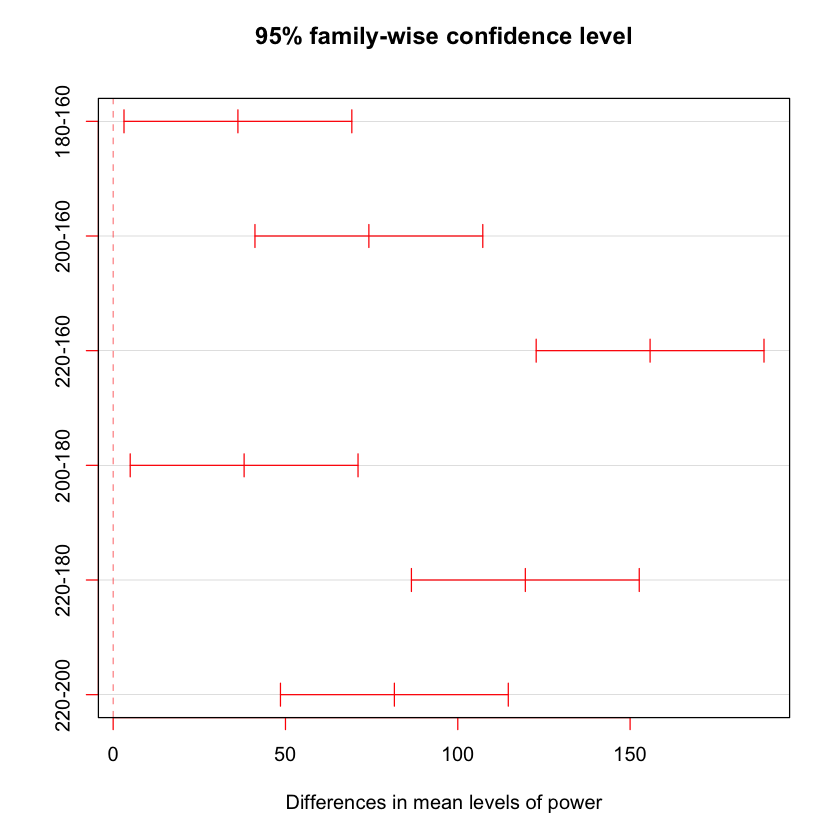

In [31]:
plot(TukeyHSD(results.aov,conf.level=.95),col="red")

---
---


## 표본 크기와 검정력
between.var : 처리수준의 평균값들의 분산
within.var : 같은 처리수준에서 관찰된 값들의 분산

In [32]:
power.anova.test(groups = 4, n = 5, between.var = 1, within.var = 3,
                 sig.level = 0.10)


     Balanced one-way analysis of variance power calculation 

         groups = 4
              n = 5
    between.var = 1
     within.var = 3
      sig.level = 0.1
          power = 0.4958342

NOTE: n is number in each group


In [33]:
power.anova.test(groups = 4, between.var = 1, within.var = 2,
                 sig.level = 0.1, power = 0.7)


     Balanced one-way analysis of variance power calculation 

         groups = 4
              n = 5.460819
    between.var = 1
     within.var = 2
      sig.level = 0.1
          power = 0.7

NOTE: n is number in each group


---
---

## Example

### A Real Economy Application (Sec.3.8)

In [38]:
d1 <- c(5.43,5.71,6.22,6.01,5.29); d2 <- c(6.24,6.71,5.98,5.66,6.60);
d3 <- c(8.79,9.20,7.90,8.15,7.55)
sales.data <- data.frame(
  design = as.factor(rep(1:3,each = 5)),
  sales.up = c(d1,d2,d3)
)
sales.data

design,sales.up
<fct>,<dbl>
1,5.43
1,5.71
1,6.22
1,6.01
1,5.29
2,6.24
2,6.71
2,5.98
2,5.66


In [39]:
sales.aov <- aov(sales.up~design,data = sales.data);anova(sales.aov)
sales.aov 

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
design,2,18.78305,9.3915267,35.77225,8.781737e-06
Residuals,12,3.15044,0.2625367,NA,NA


Call:
   aov(formula = sales.up ~ design, data = sales.data)

Terms:
                  design Residuals
Sum of Squares  18.78305   3.15044
Deg. of Freedom        2        12

Residual standard error: 0.5123833
Estimated effects may be unbalanced

In [40]:
sales.lm <- lm(sales.up~design,data = sales.data);summary(sales.lm)
sales.lm


Call:
lm(formula = sales.up ~ design, data = sales.data)

Residuals:
   Min     1Q Median     3Q    Max 
-0.768 -0.360 -0.022  0.417  0.882 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   5.7320     0.2291  25.015 1.01e-11 ***
design2       0.5060     0.3241   1.561    0.144    
design3       2.5860     0.3241   7.980 3.86e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5124 on 12 degrees of freedom
Multiple R-squared:  0.8564,	Adjusted R-squared:  0.8324 
F-statistic: 35.77 on 2 and 12 DF,  p-value: 8.782e-06



Call:
lm(formula = sales.up ~ design, data = sales.data)

Coefficients:
(Intercept)      design2      design3  
      5.732        0.506        2.586  


In [41]:
# 정규성 검정

sales.residue <- residuals(sales.aov)
sales.res <- cbind(sales.data,sales.residue)
shapiro.test(sales.residue)


	Shapiro-Wilk normality test

data:  sales.residue
W = 0.96303, p-value = 0.745


In [44]:
# 등분산 검정

bartlett.test(sales.residue~design,data=sales.res)


	Bartlett test of homogeneity of variances

data:  sales.residue by design
Bartlett's K-squared = 1.2638, df = 2, p-value = 0.5316


In [46]:
# 사후분석

TukeyHSD(sales.aov,conf.level=.95) 

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = sales.up ~ design, data = sales.data)

$design
     diff       lwr      upr     p adj
2-1 0.506 -0.358547 1.370547 0.2988893
3-1 2.586  1.721453 3.450547 0.0000107
3-2 2.080  1.215453 2.944547 0.0000909


---

### ANCOVA Example
통제 불가능한 변수가 반응 변수에 미치는 영향력을 고려한 분석 </br>
통제 불가능한 변수 : 공변량

In [47]:
ancova.data <- data.frame(
  machine = as.factor(c(rep(1:3, each = 5))), 
  diameter = c(20,25,24,25,32,22,28,22,30,28,21,23,26,21,15), 
  breaking = c(36,41,39,42,49,40,48,39,45,44,35,37,42,34,32)
)
summary(ancova.data)

 machine    diameter        breaking   
 1:5     Min.   :15.00   Min.   :32.0  
 2:5     1st Qu.:21.50   1st Qu.:36.5  
 3:5     Median :24.00   Median :40.0  
         Mean   :24.13   Mean   :40.2  
         3rd Qu.:27.00   3rd Qu.:43.0  
         Max.   :32.00   Max.   :49.0  

In [51]:
# 공변량을 고려하지 않은 계산

anova(aov(breaking~machine, data = ancova.data))

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
machine,2,140.4,70.20000,4.08932,0.04423194
Residuals,12,206.0,17.16667,NA,NA


In [52]:
# 공변량을 고려한 계산

anova(aov(breaking~diameter+machine, data = ancova.data))

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
diameter,1,305.13026,305.130260,119.933042,2.960132e-07
machine,2,13.28385,6.641925,2.610643,1.180839e-01
Residuals,11,27.98589,2.544172,NA,NA


In [50]:
summary(lm(breaking~diameter+machine, data = ancova.data))


Call:
lm(formula = breaking ~ diameter + machine, data = ancova.data)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.0160 -0.9586 -0.3841  0.9518  2.8920 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   17.360      2.961   5.862 0.000109 ***
diameter       0.954      0.114   8.365 4.26e-06 ***
machine2       1.037      1.013   1.024 0.328012    
machine3      -1.584      1.107  -1.431 0.180292    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.595 on 11 degrees of freedom
Multiple R-squared:  0.9192,	Adjusted R-squared:  0.8972 
F-statistic: 41.72 on 3 and 11 DF,  p-value: 2.665e-06


---

### Exercise 3.18 Unbalanced ANOVA

In [53]:
catalyst.data <- data.frame(
  catalyst=as.factor(c(1,1,1,1,1,2,2,2,2,3,3,3,4,4,4,4)),
  concentration = c(58.2,57.2,58.4,55.8,55.2,56.3,54.5,57.0,55.3,
                  50.1,54.2,55.4,52.9,49.9,50.0,51.7)
)

In [54]:
anova(aov(concentration~catalyst,data = catalyst.data))

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
catalyst,3,87.13571,29.045236,10.42491,0.001163852
Residuals,12,33.43367,2.786139,NA,NA


In [55]:
summary(lm(concentration~catalyst,data = catalyst.data))


Call:
lm(formula = concentration ~ catalyst, data = catalyst.data)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.1333 -1.1763  0.3825  1.2288  2.1667 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  56.9600     0.7465  76.305  < 2e-16 ***
catalyst2    -1.1850     1.1197  -1.058 0.310755    
catalyst3    -3.7267     1.2190  -3.057 0.009951 ** 
catalyst4    -5.8350     1.1197  -5.211 0.000218 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.669 on 12 degrees of freedom
Multiple R-squared:  0.7227,	Adjusted R-squared:  0.6534 
F-statistic: 10.42 on 3 and 12 DF,  p-value: 0.001164


In [56]:
# 잔차 계산
catalyst.residual <- residuals(
  aov(concentration~catalyst,data = catalyst.data))
  
# 정규성 검정
shapiro.test(catalyst.residual)

# 등분산 검정
bartlett.test(concentration~catalyst,data = catalyst.data)


	Shapiro-Wilk normality test

data:  catalyst.residual
W = 0.94766, p-value = 0.4535



	Bartlett test of homogeneity of variances

data:  concentration by catalyst
Bartlett's K-squared = 2.2721, df = 3, p-value = 0.5179


---
---
---

# Session 4 Experiments with Blocking Factors
블록화 실험

In [58]:
library(dplyr)

## Vascular Graft Example

In [61]:
noise <- rep(1:6,times = 4)
noise

[1] 1 2 3 4 5 6 1 2 3 4 5 6 1 2 3 4 5 6 1 2 3 4 5 6

In [62]:
input <- rep(seq(8500,9100,by = 200),each = 6)
input

[1] 8500 8500 8500 8500 8500 8500 8700 8700 8700 8700 8700 8700 8900 8900 8900
[16] 8900 8900 8900 9100 9100 9100 9100 9100 9100

In [63]:
output <- c(90.3,89.2,98.2,93.9,87.4,97.9,92.5,89.5,90.6,94.7,87.0,95.8,
           85.5,90.8,89.6,86.2,88.0,93.4,82.5,89.5,85.6,87.4,78.9,90.7)
output

[1] 90.3 89.2 98.2 93.9 87.4 97.9 92.5 89.5 90.6 94.7 87.0 95.8 85.5 90.8 89.6
[16] 86.2 88.0 93.4 82.5 89.5 85.6 87.4 78.9 90.7

In [64]:
rcbd.data <- data.frame(
  batch = as.factor(noise),pressure = as.factor(input), yield = output
)
rcbd.data

batch,pressure,yield
<fct>,<fct>,<dbl>
1,8500,90.3
2,8500,89.2
3,8500,98.2
4,8500,93.9
5,8500,87.4
6,8500,97.9
1,8700,92.5
2,8700,89.5
3,8700,90.6


### aov : 분산 분석

In [69]:
# 잡음에 의한 효과를 배제한 인자의 효과 분석

rcbd.aov <- aov(yield~pressure+batch,data=rcbd.data);
anova(rcbd.aov)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
pressure,3,178.1713,59.39042,8.107077,0.001916300
batch,5,192.2521,38.45042,5.248666,0.005531737
Residuals,15,109.8863,7.32575,NA,NA


In [67]:
# 잡음에 의한 효과를 배제하지 않고 잘못 분석한 결과

anova(aov(yield~pressure,data=rcbd.data))

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
pressure,3,178.1713,59.39042,3.931339,0.02344796
Residuals,20,302.1383,15.10692,NA,NA


### 모델의 유의성 검정

In [72]:
# 잔차 계산

rcbd.residue <- residuals(rcbd.aov);fit <- fitted(rcbd.aov)
rcbd.data <- cbind(rcbd.data,rcbd.residue,fit)

In [73]:
# 정규성 검정

shapiro.test(rcbd.residue)


	Shapiro-Wilk normality test

data:  rcbd.residue
W = 0.95631, p-value = 0.3689


In [74]:
# 등분산 검정

with(rcbd.data,bartlett.test(rcbd.residue~batch))
with(rcbd.data,bartlett.test(rcbd.residue~pressure))


	Bartlett test of homogeneity of variances

data:  rcbd.residue by batch
Bartlett's K-squared = 7.6842, df = 5, p-value = 0.1745



	Bartlett test of homogeneity of variances

data:  rcbd.residue by pressure
Bartlett's K-squared = 0.15654, df = 3, p-value = 0.9843


In [75]:
# 사후 분석

TukeyHSD(rcbd.aov);

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = yield ~ pressure + batch, data = rcbd.data)

$pressure
               diff        lwr       upr     p adj
8700-8500 -1.133333  -5.637161  3.370495 0.8854831
8900-8500 -3.900000  -8.403828  0.603828 0.1013084
9100-8500 -7.050000 -11.553828 -2.546172 0.0020883
8900-8700 -2.766667  -7.270495  1.737161 0.3245644
9100-8700 -5.916667 -10.420495 -1.412839 0.0086667
9100-8900 -3.150000  -7.653828  1.353828 0.2257674

$batch
      diff         lwr        upr     p adj
2-1  2.050  -4.1680828  8.2680828 0.8853016
3-1  3.300  -2.9180828  9.5180828 0.5376297
4-1  2.850  -3.3680828  9.0680828 0.6757699
5-1 -2.375  -8.5930828  3.8430828 0.8105903
6-1  6.750   0.5319172 12.9680828 0.0297368
3-2  1.250  -4.9680828  7.4680828 0.9845521
4-2  0.800  -5.4180828  7.0180828 0.9980198
5-2 -4.425 -10.6430828  1.7930828 0.2483499
6-2  4.700  -1.5180828 10.9180828 0.1986961
4-3 -0.450  -6.6680828  5.7680828 0.9998784
5

---
---

## Lation Square Design
잡음변수가 2개인 경우 k개 숫자가 각 행과 열에 한 번만 나타나도록 정사각형으로 배열

In [77]:
noise1 <- as.factor(rep(1:5,each =5))
noise2 <- as.factor(rep(1:5,times = 5))
treat <- as.factor(c("A","B","C","D","E","B","C","D","E","A",
                     "C","D","E","A","B","D","E","A","B","C",
                     "E","A","B","C","D"))
y <- c(24,17,18,26,22,
       20,24,38,31,30,
       19,30,26,26,20,
       24,27,27,23,29,
       24,36,21,22,31)
latin.data <- data.frame(operator=noise1,batch=noise2,
                         formulation=treat,propulsion=y)

### Full Model including all noises and factor

In [80]:
anova(aov(propulsion~formulation+batch+operator,data=latin.data))

# 분석 결과 batch의 p-valuerk 유의수준보다 크므로 오차항에 pooling

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
formulation,4,330,82.50000,7.734375,0.002536502
batch,4,68,17.00000,1.593750,0.239058537
operator,4,150,37.50000,3.515625,0.040373048
Residuals,12,128,10.66667,NA,NA


### Reduced Model excluding insignificant noise
통계적으로 유의하지 않은 효과를 제외하여 모형의 축소 진행

In [82]:
latin.aov <- aov(propulsion~formulation+operator,
                 data=latin.data) 
anova(latin.aov)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
formulation,4,330,82.50,6.734694,0.002237112
operator,4,150,37.50,3.061224,0.047377612
Residuals,16,196,12.25,NA,NA


In [83]:
shapiro.test(resid(latin.aov)) # 정규성 검정
bartlett.test(propulsion~formulation,data=latin.data) # 등분산 검정

# 검정 결과 두 가정 모두를 만족함을 확인할 수 있다


	Shapiro-Wilk normality test

data:  resid(latin.aov)
W = 0.95045, p-value = 0.2567



	Bartlett test of homogeneity of variances

data:  propulsion by formulation
Bartlett's K-squared = 3.0816, df = 4, p-value = 0.5443


---
---

## BIBD

RIBD(Randomized Incomplete Block Design) : 모든 블록에서 모든 인자의 처리수준에 대해 실험이 불가능한 경우 </br>
BIBD(Balanced Incomplete Block Design) : RIBD 실험 중 각 처리수준에 대한 실험의 횟수가 동일한 경우

In [85]:
bibd.data <- data.frame(block = as.factor(rep(1:4,each=4)),
                        catalyst = as.factor(rep(1:4,times=4)),
                        response = c(73,NA,73,75,74,75,75,NA,
                                     NA,67,68,72,71,72,NA,75),
                        na.rm=TRUE)

In [86]:
bibd.aov <- aov(response~catalyst+block,data=bibd.data)
anova(bibd.aov)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
catalyst,3,11.66667,3.888889,5.982906,0.0414634354
block,3,66.08333,22.027778,33.888889,0.0009527577
Residuals,5,3.25000,0.650000,NA,NA


In [89]:
bibd.residue <- residuals(bibd.aov);
shapiro.test(bibd.residue)


	Shapiro-Wilk normality test

data:  bibd.residue
W = 0.96945, p-value = 0.905


---
---

## Example

### Exercise 4.11: Blocking Experiments

In [90]:
design <- as.factor(c(rep(1:5, each = 6)))
velocity <- as.factor(rep(c(11.73,14.37,16.59,20.43,23.46,28.74),times=5))
perf <- c(0.78,0.85,0.93,1.14,0.97,0.80,0.85,0.92,0.97,0.86,
          0.81,0.92,0.95,0.98,0.78,0.75,0.86,0.89,0.88,0.76,
          0.77,0.81,0.89,0.86,0.76,0.78,0.83,0.83,0.83,0.75)
nozzle.data <- data.frame(design,velocity,perf)

In [91]:
nozzle.aov <- aov(perf~velocity+design,data=nozzle.data)
nozzle.lm <- lm(perf~velocity+design,data=nozzle.data)
anova(nozzle.aov); anova(nozzle.lm)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
velocity,5,0.004946667,0.0009893333,0.1191107,0.9866094
design,4,0.051280000,0.0128200000,1.5434626,0.2279324
Residuals,20,0.166120000,0.0083060000,NA,NA


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
velocity,5,0.004946667,0.0009893333,0.1191107,0.9866094
design,4,0.051280000,0.0128200000,1.5434626,0.2279324
Residuals,20,0.166120000,0.0083060000,NA,NA


In [92]:
nozzle.res <- resid(nozzle.aov) # 잔차 계산
shapiro.test(nozzle.res) # 정규성 검정
bartlett.test(nozzle.res~design,data=nozzle.data) # 등분산 검정


	Shapiro-Wilk normality test

data:  nozzle.res
W = 0.97402, p-value = 0.6538



	Bartlett test of homogeneity of variances

data:  nozzle.res by design
Bartlett's K-squared = 9.5337, df = 4, p-value = 0.04906


---

### Exercise 4.21: Latin Square Design

In [94]:
batch <- as.factor(c(rep(1:5,times=5)))
day <- as.factor(c(rep(1:5,each=5)))
ingred <- as.factor(c("a","c","b","d","e",
                      "b","e","a","c","d",
                      "d","a","c","e","b",
                      "c","d","e","b","a",
                      "e","b","d","a","c"))
time <- c(8,11,4,6,4,7,2,9,8,2,1,7,10,6,3,7,3,1,6,8,3,8,5,10,8)
reaction.data <- data.frame(batch,day,ingred,time)

In [96]:
summary(aov(time~batch+day+ingred,data=reaction.data))

# batch와 day의 p-value가 유의수준보다 크므로 오차항으로 pooling

            Df Sum Sq Mean Sq F value   Pr(>F)    
batch        4  15.44    3.86   1.235 0.347618    
day          4  12.24    3.06   0.979 0.455014    
ingred       4 141.44   35.36  11.309 0.000488 ***
Residuals   12  37.52    3.13                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [97]:
reaction.aov <- aov(time~ingred,data=reaction.data) # Reduced Model
summary(reaction.aov)

            Df Sum Sq Mean Sq F value   Pr(>F)    
ingred       4  141.4   35.36   10.85 7.67e-05 ***
Residuals   20   65.2    3.26                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [98]:
# 모델의 유의성 검정

reaction.res <- resid(reaction.aov)
shapiro.test(reaction.res)
bartlett.test(reaction.res~ingred,data=reaction.data)


	Shapiro-Wilk normality test

data:  reaction.res
W = 0.95305, p-value = 0.2933



	Bartlett test of homogeneity of variances

data:  reaction.res by ingred
Bartlett's K-squared = 1.5544, df = 4, p-value = 0.817


---
---
---

# Session 5 Factorial Experiments
요인 배치 실험

In [100]:
library(dplyr)

## Two-Factor Experiments 2인자 요인배치실험

In [102]:
x1 <- as.factor(rep(c(15,70,125),each=12))
x2 <- as.factor(rep((rep((1:3),each=4)),times=3))
y <- c(130,155,74,180,150,188,159,126,138,110,168,160,
       34,40,80,75,136,122,106,115,174,120,150,139,
       20,70,82,58,25,70,58,45,96,104,82,60)
battery.data <- data.frame(temp = x1, material = x2, life = y) 

### aov(종속변수~독립변수*독립변수) : 독립변수들 사이의 교호작용 분석

In [107]:
battery.aov <- aov(life~material*temp,data=battery.data)
anova(battery.aov)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
material,2,10683.722,5341.861,7.911372,1.976083e-03
temp,2,39118.722,19559.361,28.967692,1.908596e-07
material:temp,4,9613.778,2403.444,3.559535,1.861117e-02
Residuals,27,18230.750,675.213,NA,NA


### 모델 유의성 검정

In [106]:
battery.res <- resid(battery.aov) # 잔차 계산
battery.data.res <- cbind(battery.data,battery.res)

shapiro.test(battery.res)
bartlett.test(battery.res~material,data=battery.data)


	Shapiro-Wilk normality test

data:  battery.res
W = 0.97606, p-value = 0.6117



	Bartlett test of homogeneity of variances

data:  battery.res by material
Bartlett's K-squared = 3.1737, df = 2, p-value = 0.2046


---

## Drink Bottling Example: General Factorial Experiments

In [ ]:
# Import Datasets from Excel
general.data <- data.frame(percent=as.factor(general_data$Percent),
                           speed=as.factor(general_data$Speed),
                           pressure=as.factor(general_data$Pressure),
                           deviation=general_data$Deviation)

In [ ]:
anova(aov(deviation~percent*speed*pressure,data=general.data))
# 분석 결과 세 처리수준 각각의 교호작용의 p-value 값이 유의수준보다 크므로 오차항으로 pooling

general.reduced <- aov(deviation~percent+speed+pressure,data=general.data)
anova(general.reduced)

---
---

## Example

### Example 5-5: Fitting Response with Qualitative Factor

In [113]:
battery.data$temp.num <- as.numeric(as.character(battery.data$temp))

In [115]:
battery.aov.quad <- aov(life~material+temp.num+I(temp.num^2)
                        +material:temp.num+material:I(temp.num^2),
                        data=battery.data)
anova(battery.aov.quad)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
material,2,10683.72222,5341.86111,7.9113723,1.976083e-03
temp.num,1,39042.66667,39042.66667,57.8227445,3.525248e-08
I(temp.num^2),1,76.05556,76.05556,0.1126394,7.397530e-01
material:temp.num,2,2315.08333,1157.54167,1.7143357,1.991088e-01
material:I(temp.num^2),2,7298.69444,3649.34722,5.4047351,1.061214e-02
Residuals,27,18230.75000,675.21296,NA,NA


---

### Example 5-6: Tool Life Experiments

In [117]:
tool.data <- data.frame(speed=rep(c(125,150,175),each=6),
                        angle=rep(rep(c(15,20,25),each=2),times=3),
                        life=c(-2,-1,0,2,-1,0,
                               -3,0,1,3,5,6,
                               2,3,4,6,0,-1))

In [118]:
tool.lm <- lm(life~angle*speed+I(angle^2)*I(speed^2)+
                angle:I(speed^2)+I(angle^2):speed,tool.data)
summary(tool.lm)


Call:
lm(formula = life ~ angle * speed + I(angle^2) * I(speed^2) + 
    angle:I(speed^2) + I(angle^2):speed, data = tool.data)

Residuals:
   Min     1Q Median     3Q    Max 
  -1.5   -0.5    0.0    0.5    1.5 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)  
(Intercept)           -1.068e+03  7.022e+02  -1.521   0.1626  
angle                  1.363e+02  7.261e+01   1.877   0.0932 .
speed                  1.448e+01  9.503e+00   1.524   0.1619  
I(angle^2)            -4.080e+00  1.810e+00  -2.254   0.0507 .
I(speed^2)            -4.960e-02  3.164e-02  -1.568   0.1514  
angle:speed           -1.864e+00  9.827e-01  -1.897   0.0903 .
I(angle^2):I(speed^2) -1.920e-04  8.158e-05  -2.353   0.0431 *
angle:I(speed^2)       6.400e-03  3.272e-03   1.956   0.0822 .
speed:I(angle^2)       5.600e-02  2.450e-02   2.285   0.0481 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.202 on 9 degrees of freedom
Multiple R-squared:

---

### Exercise 5.9: Qualitative Factors

In [121]:
tube.data <- data.frame(glass=as.factor(rep(rep(1:2,each=3),times=3)),
                        phosphor=as.factor(rep(1:3,each=6)),
                        brightness=c(280,290,285,240,235,240,
                                     300,310,295,260,240,235,
                                     290,285,290,220,225,230))

In [127]:
anova(lm(brightness~glass*phosphor,data=tube.data))

# glass와 phosphor의 교호작용이 1.638421e-01=0.2로 유의수준보다 크므로 오차항으로 pooling

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
glass,1,13888.8889,13888.8889,277.777778,1.158408e-09
phosphor,2,877.7778,438.8889,8.777778,4.479739e-03
glass:phosphor,2,211.1111,105.5556,2.111111,1.638421e-01
Residuals,12,600.0000,50.0000,NA,NA


In [126]:
tube.lm <- lm(brightness~glass+phosphor,data=tube.data) # Reduced Model
anova(tube.lm);

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
glass,1,13888.8889,13888.88889,239.726027,3.343648e-10
phosphor,2,877.7778,438.88889,7.575342,5.893251e-03
Residuals,14,811.1111,57.93651,NA,NA


In [124]:
# 모델 적합성 검정

tube.res <- resid(tube.lm)
shapiro.test(tube.res)
bartlett.test(tube.res~tube.data$glass)
bartlett.test(tube.res~tube.data$phosphor)


	Shapiro-Wilk normality test

data:  tube.res
W = 0.96474, p-value = 0.6951



	Bartlett test of homogeneity of variances

data:  tube.res by tube.data$glass
Bartlett's K-squared = 0.65039, df = 1, p-value = 0.42



	Bartlett test of homogeneity of variances

data:  tube.res by tube.data$phosphor
Bartlett's K-squared = 1.6972, df = 2, p-value = 0.428


---

### Exercies 5.22: 2-Way ANOVA with a Blocking Factor

In [128]:
temp <- as.factor(rep(c("low","medium","high"),times=6))
pressure <- as.factor(rep(seq(250,270,by=10),each=3,times=2))
block <- as.factor(rep(c(1,2),each=9))
response <- c(86.3,88.5,89.1,84.0,87.3,90.2,85.8,89.0,91.3,
              86.1,89.4,91.7,85.2,89.9,93.2,89.3,90.3,93.7)
chem.data <- data.frame(temp,pressure,block,response)
chem.data

temp,pressure,block,response
<fct>,<fct>,<fct>,<dbl>
low,250,1,86.3
medium,250,1,88.5
high,250,1,89.1
low,260,1,84.0
medium,260,1,87.3
high,260,1,90.2
low,270,1,85.8
medium,270,1,89.0
high,270,1,91.3


In [130]:
anova(lm(response~block+temp*pressure,data=chem.data))

# temp와 pressure의 교호작용의 p-value가 2.056335e-01=0.2로 유의수준보다 크므로 오차항으로 pooling

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
block,1,16.627222,16.6272222,23.635933,1.253128e-03
temp,2,88.254444,44.1272222,62.727739,1.291262e-05
pressure,2,9.041111,4.5205556,6.426061,2.166501e-02
temp:pressure,4,5.318889,1.3297222,1.890227,2.056335e-01
Residuals,8,5.627778,0.7034722,NA,NA


In [131]:
chem.lm <- lm(response~block+temp+pressure,data=chem.data)
anova(chem.lm)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
block,1,16.627222,16.6272222,18.227162,1.089381e-03
temp,2,88.254444,44.1272222,48.373325,1.805478e-06
pressure,2,9.041111,4.5205556,4.955542,2.698387e-02
Residuals,12,10.946667,0.9122222,NA,NA


In [132]:
# 모델 적합성 검정
chem.res <- resid(chem.lm)
shapiro.test(chem.res)
bartlett.test(chem.res~chem.data$block)
bartlett.test(chem.res~chem.data$temp)
bartlett.test(chem.res~chem.data$pressure)


	Shapiro-Wilk normality test

data:  chem.res
W = 0.94766, p-value = 0.3895



	Bartlett test of homogeneity of variances

data:  chem.res by chem.data$block
Bartlett's K-squared = 0.13681, df = 1, p-value = 0.7115



	Bartlett test of homogeneity of variances

data:  chem.res by chem.data$temp
Bartlett's K-squared = 2.2665, df = 2, p-value = 0.322



	Bartlett test of homogeneity of variances

data:  chem.res by chem.data$pressure
Bartlett's K-squared = 0.61708, df = 2, p-value = 0.7345


---
---
---